In [1]:
# # https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f

# Minkowski distance
# https://en.wikipedia.org/wiki/Minkowski_distance

# Distance de Manhattan
# https://fr.wikipedia.org/wiki/Distance_de_Manhattan

# Euclidean distance
# https://en.wikipedia.org/wiki/Euclidean_distance

# Adaboost
# https://www.datacamp.com/tutorial/adaboost-classifier-python
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

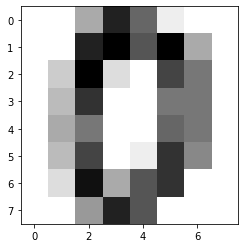

In [3]:
data = datasets.load_digits()
plt.imshow(data.images[0], cmap=plt.cm.gray_r)

In [4]:
# تبدیل ماتریس به یک صفحه یا همون فلت کردن
X = data.images.reshape((len(data.images), -1))

In [5]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
y = data.target

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

In [8]:
# با استفاده از 1000 درخت بررسی میکنیم و به صورت دیفالت 100 تاست
RfcClf = RandomForestClassifier(n_estimators=1000)
# learning
RfcClf.fit(X[:1000], y[:1000])

RandomForestClassifier(n_estimators=1000)

In [9]:
p = RfcClf.predict(X[1000:])
e = y[1000:]
print(metrics.classification_report(e, p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.95      0.89      0.92        80
           2       0.99      0.91      0.95        77
           3       0.94      0.84      0.89        79
           4       0.98      0.95      0.96        83
           5       0.89      0.99      0.94        82
           6       0.99      0.99      0.99        80
           7       0.93      1.00      0.96        80
           8       0.88      0.88      0.88        76
           9       0.85      0.93      0.89        81

    accuracy                           0.94       797
   macro avg       0.94      0.94      0.94       797
weighted avg       0.94      0.94      0.94       797



In [10]:
print(metrics.confusion_matrix(e, p))

[[78  0  0  0  1  0  0  0  0  0]
 [ 0 71  0  1  0  1  0  0  0  7]
 [ 1  1 70  2  0  0  0  0  0  3]
 [ 0  1  0 66  0  3  0  3  6  0]
 [ 0  0  0  0 79  0  0  2  0  2]
 [ 0  0  0  0  0 81  1  0  0  0]
 [ 0  0  0  0  0  0 79  0  1  0]
 [ 0  0  0  0  0  0  0 80  0  0]
 [ 0  2  1  0  1  3  0  1 67  1]
 [ 0  0  0  1  0  3  0  0  2 75]]


In [11]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
# با استفاده از 1000 درخت بررسی میکنیم و به صورت دیفالت 100 تاست
AdaClf = AdaBoostClassifier(n_estimators=1000)
# learning
AdaClf.fit(X[:1000], y[:1000])
# این الگوریتم کمی کندتر هست چونکه نمیتواند به صورت موازی درخت بسازه و به این صورت هست که اول درخت اول ساخته میشود
# بعد میره سراغ درخت بعدی و همینطور خودش رو بهبود میده تا به یک نتیجه ایده آل برسه

AdaBoostClassifier(n_estimators=1000)

In [13]:
p = AdaClf.predict(X[1000:])
e = y[1000:]
print(metrics.classification_report(e, p))
# نتیجه ای که میبینیم بسیار ضعیف است و درصدی که به ما نشان میدهد 26 درصد هست
# روی بعضی از دیتاها چنین جواب ضعیفی رو به ما نمایش میده

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        79
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        77
           3       0.13      0.97      0.22        79
           4       0.00      0.00      0.00        83
           5       0.00      0.00      0.00        82
           6       0.47      0.34      0.39        80
           7       0.00      0.00      0.00        80
           8       0.00      0.00      0.00        76
           9       0.76      0.38      0.51        81

    accuracy                           0.26       797
   macro avg       0.22      0.27      0.20       797
weighted avg       0.22      0.26      0.20       797



/home/shahin/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shahin/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shahin/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.svm import SVC

In [15]:
# با استفاده از 100 درخت بررسی میکنیم و به صورت دیفالت 100 تاست
SvcAdaClf = AdaBoostClassifier(base_estimator=SVC(probability=True, kernel='rbf'), n_estimators=100)
# learning
SvcAdaClf.fit(X[:1000], y[:1000])
# سرعت اس وی ام نسبت به بقیه درخت های تصمیم کمی کندتر است

AdaBoostClassifier(base_estimator=SVC(probability=True), n_estimators=100)

In [16]:
p = SvcAdaClf.predict(X[1000:])
e = y[1000:]
print(metrics.classification_report(e, p))
# همونطور که مشاهده میکنیم دقت رشد بسیار زیادی کرده نسبت به حالت ساده آدابوست

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        79
           1       0.94      0.99      0.96        80
           2       1.00      0.88      0.94        77
           3       0.79      0.82      0.81        79
           4       0.96      0.95      0.96        83
           5       0.87      0.99      0.93        82
           6       0.96      0.97      0.97        80
           7       0.87      0.96      0.91        80
           8       0.86      0.88      0.87        76
           9       0.98      0.79      0.88        81

    accuracy                           0.92       797
   macro avg       0.92      0.92      0.92       797
weighted avg       0.92      0.92      0.92       797

